In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the Excel file
file_path = '/content/drive/MyDrive/Sales.xlsx'
sales_data = pd.read_excel(file_path,sheet_name='time_series')

sales_data.head()

,sale_date,product_unit_sales,discount_amount (Rs.),mrp_amount (Rs.),product
0,2016-07-30,1469,841262.54,2772121.0,shirt
1,2016-12-24,2668,951832.49,5265812.0,shirt
2,2016-09-05,595,20077.38,1112225.0,shirt
3,2016-09-08,655,127786.36,1238535.0,shirt
4,2016-07-17,2561,1385088.70,4822249.0,shirt


In [ ]:
sales_data = sales_data.rename(columns={'sale_date': 'ds', 'product_unit_sales': 'y'})
# Ensure the 'ds' column is in datetime format
sales_data['ds'] = pd.to_datetime(sales_data['ds'])

# Sort the data by date
sales_data = sales_data.sort_values(by='ds')

# Display the processed data
sales_data.head()

,ds,y,discount_amount (Rs.),mrp_amount (Rs.),product
225,2016-01-01,831,209547.22,1476259.0,shirt
164,2016-01-02,1209,398611.22,2140831.0,shirt
209,2016-01-03,1637,556444.28,2943443.0,shirt
160,2016-01-04,665,208259.20,1185095.0,shirt
215,2016-01-05,704,240245.33,1259026.0,shirt


In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3112 entries, 225 to 3111
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ds                     3112 non-null   datetime64[ns]
 1   y                      3112 non-null   int64         
 2   discount_amount (Rs.)  3112 non-null   float64       
 3   mrp_amount (Rs.)       3112 non-null   float64       
 4   product                3112 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 145.9+ KB


In [ ]:
sales_data['ds'].apply(['min', 'max'])

,ds
min,2016-01-01
max,2024-08-19


In [ ]:
top_3 = sales_data['discount_amount (Rs.)'].value_counts().head(3)
top_3

,count
discount_amount (Rs.),
0.00,7
209547.22,1
637136.22,1


In [ ]:
top_3_sales = sales_data['y'].value_counts().head(3)
top_3_sales

,count
y,
515,11
634,11
491,10


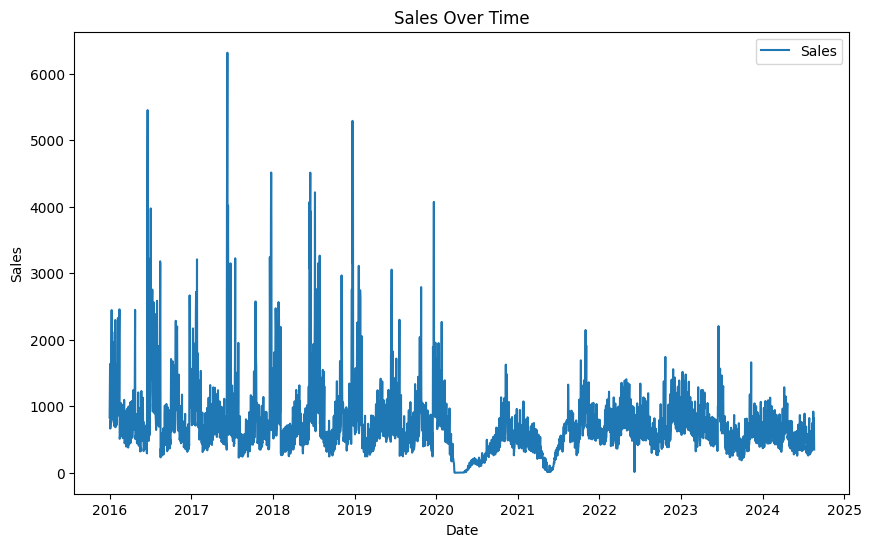

In [ ]:
# Visualize the sales data
plt.figure(figsize=(10, 6))
plt.plot(sales_data['ds'], sales_data['y'], label='Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.legend()
plt.show()

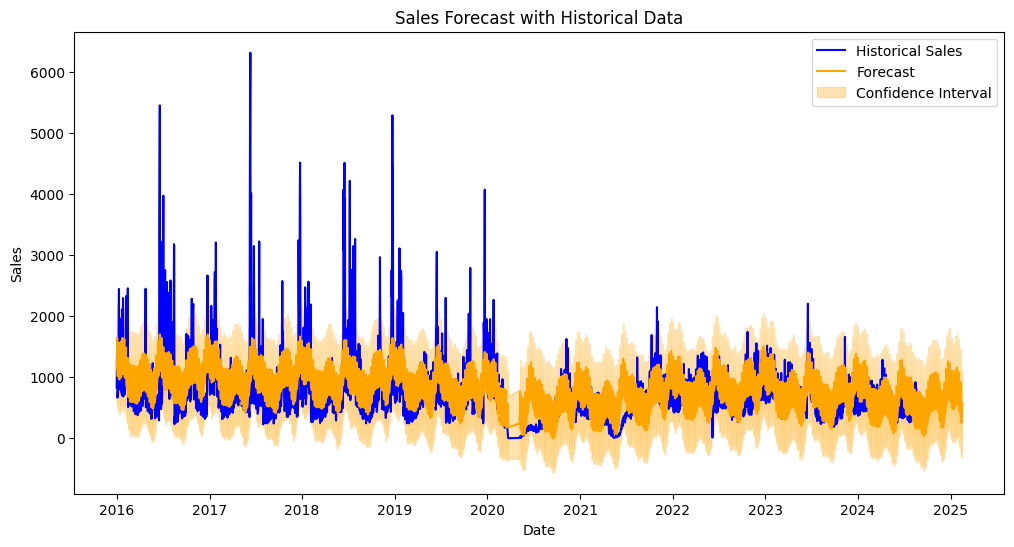

In [ ]:
# Plot 1: Historical Data with Forecast Overlay
plt.figure(figsize=(12, 6))
plt.plot(sales_data['ds'], sales_data['y'], label='Historical Sales', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.3, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast with Historical Data')
plt.legend()
plt.show()

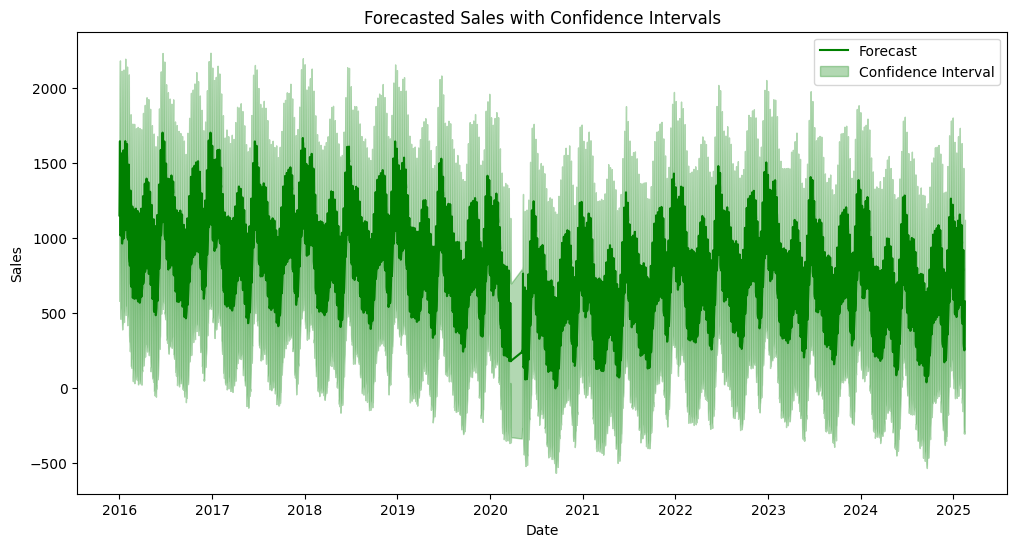

In [ ]:
#Forecasted Sales with Confidence Intervals
plt.figure(figsize=(12, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='green')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.3, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Forecasted Sales with Confidence Intervals')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

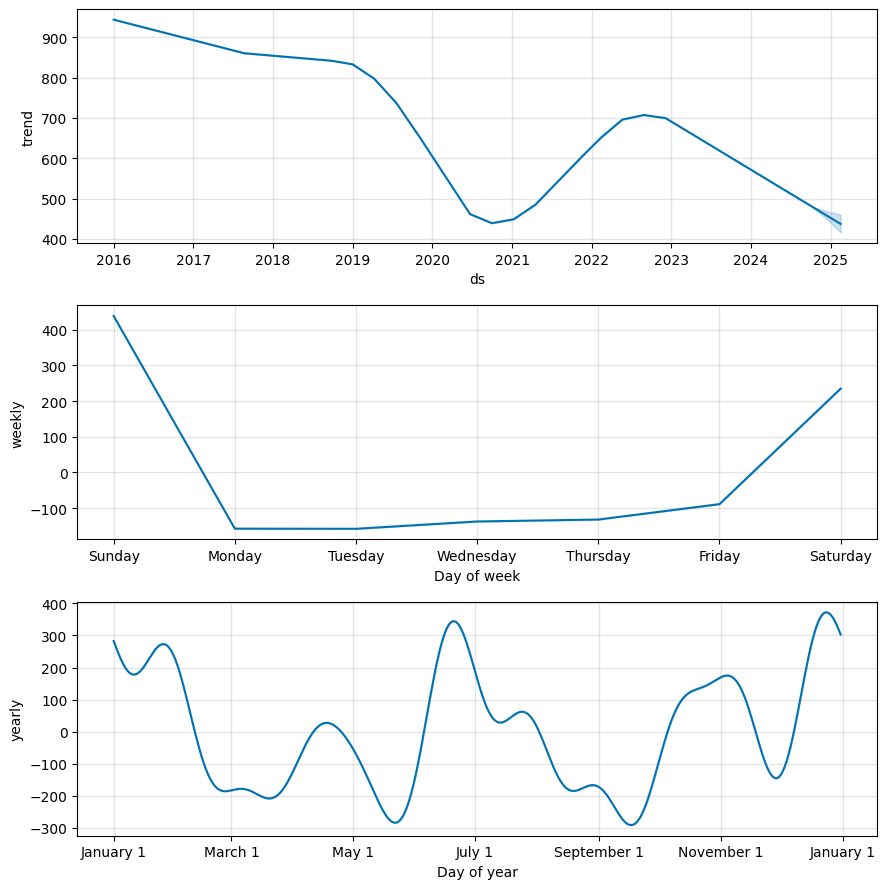

In [ ]:
# Forecast Components (Trend, Weekly, Yearly Seasonality)
model.plot_components(forecast)
plt.show()

In [ ]:
# Initialize the Prophet model
model = Prophet()
model.fit(sales_data)
# Create a dataframe for future dates (next 6 months)
future = model.make_future_dataframe(periods=6*30, freq='D')  # 6 months ahead


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0zty5k7l/wzm6nr1u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0zty5k7l/ztvh8tgi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33317', 'data', 'file=/tmp/tmp0zty5k7l/wzm6nr1u.json', 'init=/tmp/tmp0zty5k7l/ztvh8tgi.json', 'output', 'file=/tmp/tmp0zty5k7l/prophet_modelzograb9x/prophet_model-20240824134246.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:42:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:42:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Predict the future sales
forecast = model.predict(future)


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


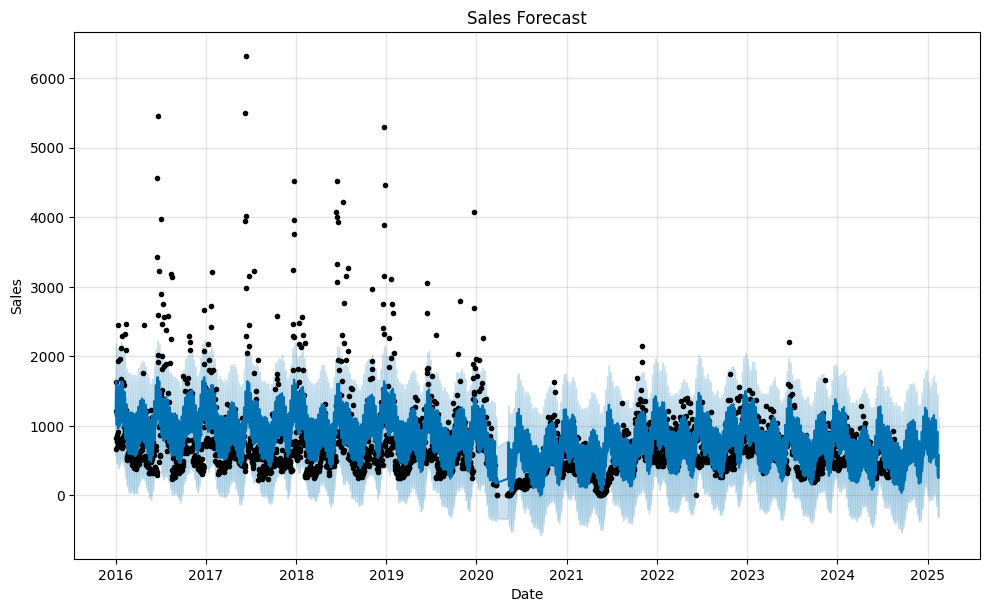

In [ ]:
# Visualize the forecast
model.plot(forecast)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

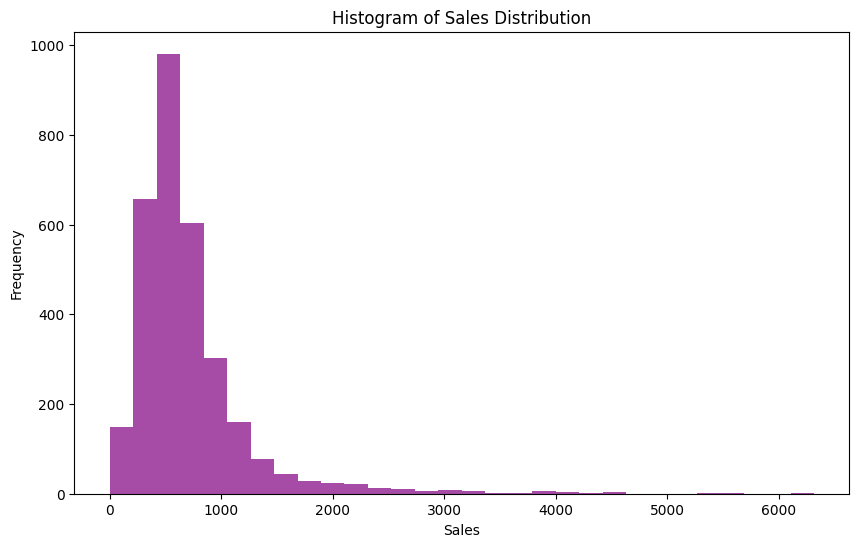

In [ ]:
#Histogram of Sales Distribution
plt.figure(figsize=(10, 6))
plt.hist(sales_data['y'], bins=30, color='purple', alpha=0.7)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales Distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

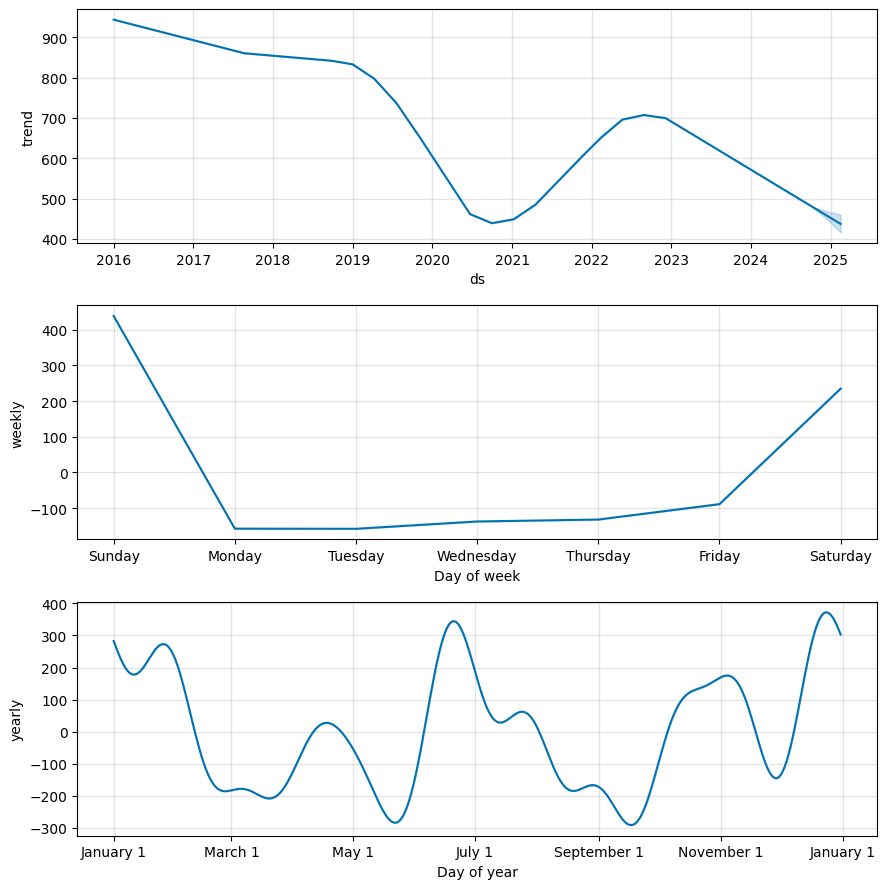

In [ ]:
# Plot the components (trend, weekly, yearly seasonality)
model.plot_components(forecast)
plt.show()

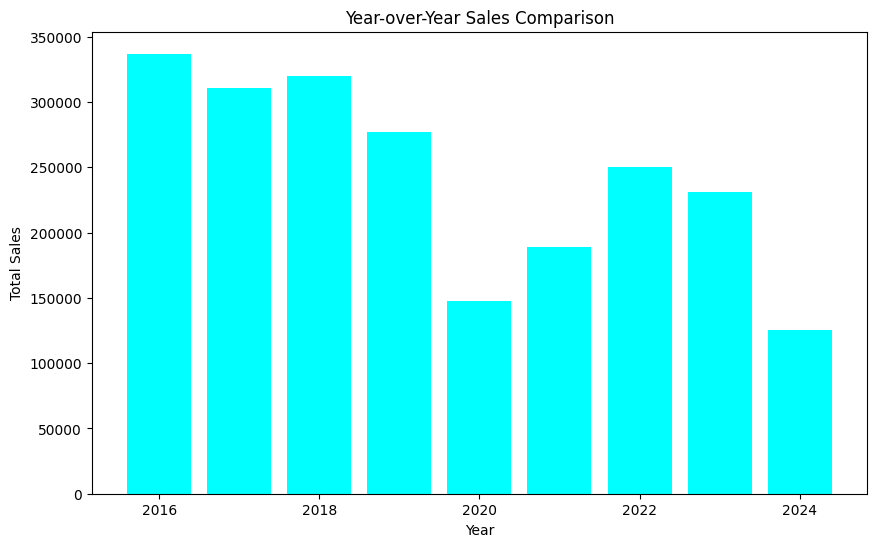

In [ ]:
# Year-over-Year Comparison
sales_data['year'] = sales_data['ds'].dt.year
yearly_sales = sales_data.groupby('year')['y'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(yearly_sales['year'], yearly_sales['y'], color='cyan')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Year-over-Year Sales Comparison')
plt.show()

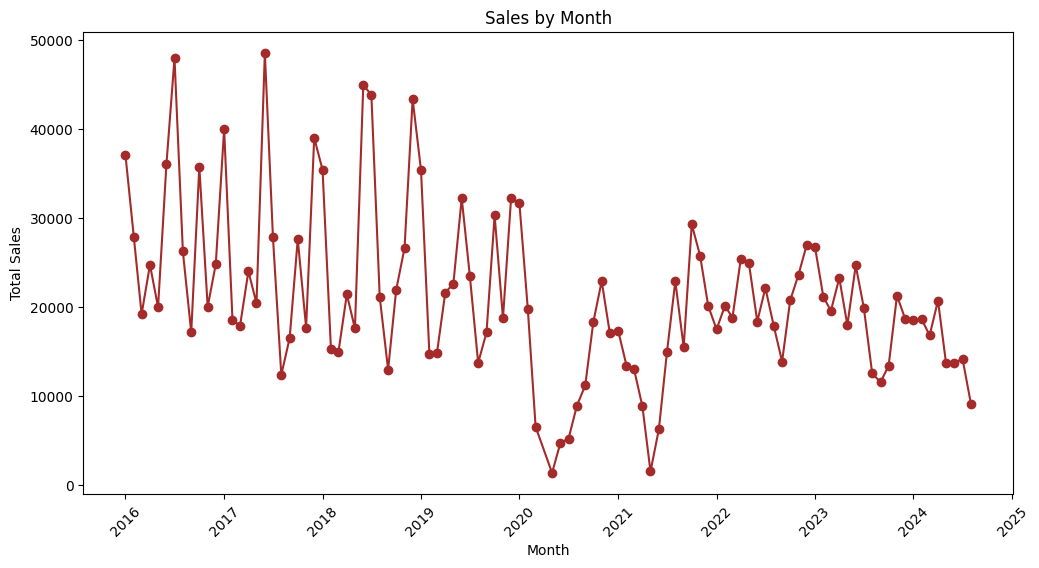

In [ ]:
# Extract the month from the date
sales_data['month'] = sales_data['ds'].dt.to_period('M')

# Aggregate sales data by month, summing only the 'y' column (which represents sales)
monthly_sales = sales_data.groupby('month')['y'].sum().reset_index()

# Convert the 'month' column back to datetime for plotting purposes
monthly_sales['month'] = monthly_sales['month'].dt.to_timestamp()

# Plotting the aggregated monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month'], monthly_sales['y'], marker='o', color='brown')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales by Month')
plt.xticks(rotation=45)
plt.show()